In [21]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from seaborn import violinplot

In [4]:
df_wine= pd.read_csv('df_wine_merged.csv')

In [6]:
#Head del df
df_wine.head()

,winery,wine,year,rating,region,price,type,body,fixed_acidity,volatile_acidity,...,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,Vinedos de Paganos,La Nieta,2015,4.7,Rioja,82.58,Rioja Red,4.0,7.9,0.60,...,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
1,Emilio Moro,Malleolus de Valderramiro,2016,4.7,Ribera del Duero,84.95,Ribera Del Duero Red,5.0,7.5,0.50,...,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red
2,Emilio Moro,Malleolus de Sanchomartin,2016,4.7,Ribera del Duero,116.54,Ribera Del Duero Red,5.0,6.7,0.58,...,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,red
3,Bodegas Mauro,Terreus Paraje de Cueva Baja,2017,4.7,Castilla y Leon,66.07,Tempranillo,4.0,7.5,0.50,...,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red
4,Vinedos de Paganos,La Nieta,2018,4.7,Rioja,89.90,Rioja Red,4.0,8.5,0.28,...,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7,red


In [7]:
# Definimos el color para los plots
COLOR_VINO_TINTO = "#7C3030"
COLOR__VINO_BLANCO = "#ffffbf"

In [8]:
#Vemos el tamaño de la base de datos
shape_df =df_wine.shape
print(f"{shape_df=}")

shape_df=(5013, 21)


In [9]:
# Vista previa de 5 datos aleatorios
df_wine.sample(5)

,winery,wine,year,rating,region,price,type,body,fixed_acidity,volatile_acidity,...,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
782,Contino,Rioja Graciano,2011,4.2,Rioja,61.94,Rioja Red,4.0,7.0,0.14,...,1.7,0.035,16.0,85.0,0.991100,3.19,0.42,11.8,6,white
4701,Conreria d'Scala Dei,Les Brugueres,2018,4.2,Priorato,16.76,Priorat Red,4.0,6.5,0.20,...,2.1,0.033,32.0,95.0,0.989435,2.96,0.61,12.0,6,white
4802,Bodegas La Horra,Corimbo I,2015,4.2,Ribera del Duero,37.90,Ribera Del Duero Red,5.0,6.0,0.29,...,10.8,0.048,55.0,149.0,0.993700,3.09,0.59,11.0,7,white
305,Scala Dei,Heretge Priorat,2018,4.4,Priorato,39.99,Priorat Red,4.0,7.1,0.46,...,2.8,0.076,15.0,37.0,0.996240,3.36,0.49,10.7,5,red
506,Vizcarra,Ines,2014,4.3,Ribera del Duero,79.98,Ribera Del Duero Red,5.0,7.7,0.57,...,1.5,0.069,4.0,9.0,0.994580,3.16,0.54,9.8,6,red


In [12]:
# Tipos de datos en cada columna
df_wine.dtypes

winery                   object
wine                     object
year                      int64
rating                  float64
region                   object
price                   float64
type                     object
body                    float64
fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
style                    object
dtype: object

In [18]:
#Chequeamos si hay valones NaN
df_wine.isnull().values.any()

False

In [14]:
#Principales medidas estadisticas
df_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
year,5013.0,2013.927788,3.811706,2002.00000,2011.00000,2015.0000,2017.0000,2021.00000
rating,5013.0,4.220547,0.068567,4.20000,4.20000,4.2000,4.2000,4.70000
price,5013.0,36.909317,21.128822,6.99000,19.98000,28.3000,49.9500,123.76000
body,5013.0,4.141632,0.561366,3.00000,4.00000,4.0000,4.0000,5.00000
fixed_acidity,5013.0,6.966836,0.877739,4.70000,6.40000,6.9000,7.5000,9.60000
volatile_acidity,5013.0,0.298399,0.114880,0.08000,0.22000,0.2800,0.3500,0.65500
citric_acid,5013.0,0.316062,0.100621,0.04000,0.26000,0.3100,0.3700,0.60000
residual_sugar,5013.0,5.564423,4.498581,0.60000,1.80000,3.9000,8.4000,17.55000
chlorides,5013.0,0.047470,0.016405,0.00900,0.03600,0.0440,0.0540,0.10600
free_sulfur_dioxide,5013.0,31.913126,15.585100,2.00000,20.00000,31.0000,43.0000,77.00000


In [20]:
#Crosstable 
pd.crosstab(df_wine.type, df_wine.quality)

quality,4,5,6,7,8
type,,,,,
Albarino,6,56,93,37,9
Cabernet Sauvignon,1,5,1,0,0
Chardonnay,0,1,2,0,0
Grenache,0,6,6,2,0
Mencia,3,59,98,41,5
Monastrell,0,3,0,0,0
Priorat Red,13,169,218,84,20
Red,19,200,277,124,26
Ribera Del Duero Red,24,287,442,176,27


### Comenzamos a analizar el conjunto de datos por medio de gráficos que nos permitan entender los rangos de datos que tenemos. 

### Análisis Univariado

En el siguiente gráfico violin podemos observar que el rango del pH de todos los vinos se encuentra entre 2.8 y 3.6, y la mayor cantidad de vinos tiene un pH cercano a 3.2


C:\Users\xpam08\Miniconda3\envs\vinos_coderhouse\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\xpam08\Miniconda3\envs\vinos_coderhouse\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:title={'center':'pH'}, xlabel='pH'>

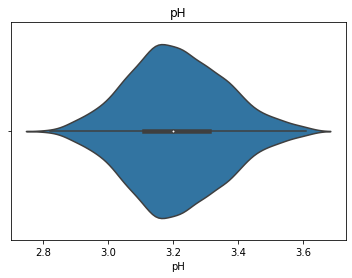

In [29]:
print('En el siguiente gráfico violin podemos observar que el rango del pH de todos los vinos se encuentra entre 2.8 y 3.6, y la mayor cantidad de vinos tiene un pH cercano a 3.2')
plt.title('pH')
violinplot(df_wine.pH, data=df_wine , orient="v")

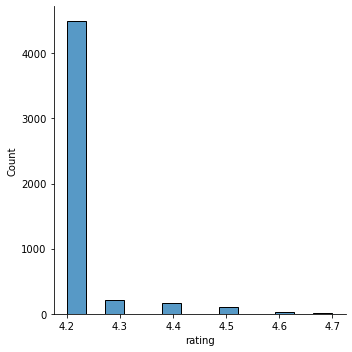

In [42]:

sns.displot(x = df_wine.rating)

Se puede oservar que la mayoria de los vinos estan clasificados coon una calidad=6


<AxesSubplot:title={'center':'Calidad de vinos'}, xlabel='count', ylabel='quality'>

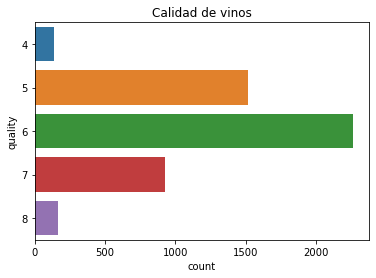

In [33]:
print('Se puede oservar que la mayoria de los vinos estan clasificados coon una calidad=6')
plt.title('Calidad de vinos')
sns.countplot(y=df_wine.quality)

Se puede observar que la mayoria de los vinos que vamos a analizar son Rioja Red y Riberda del Duero Red


<AxesSubplot:title={'center':'Tipos de vinos'}, xlabel='count', ylabel='type'>

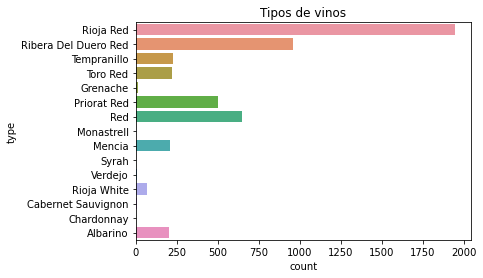

In [47]:
print('Se puede observar que la mayoria de los vinos que vamos a analizar son Rioja Red y Riberda del Duero Red')
plt.title('Tipos de vinos')
sns.countplot(y=df_wine.type)

### Análisis Bivariado

#### Continuaremos analizando la misma base datos pero la idea es profundizar mas en los datos. 


En el siguiente gráfico se puede observar que el precio de los vinos es muy variado y que no existe una relacion directa entre el año y el precio


<AxesSubplot:title={'center':'Relación año de elaboración y precio'}, xlabel='year', ylabel='price'>

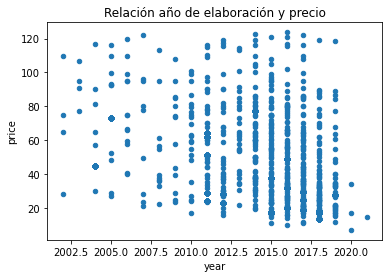

In [51]:

print('En el siguiente gráfico se puede observar que el precio de los vinos es muy variado y que no existe una relacion directa entre el año y el precio')
df_wine.plot.scatter(x='year', y='price',title='Relación año de elaboración y precio')


Se puede observar que dentro de un mismo tipo de vino, existe distintas calidades de los mismos


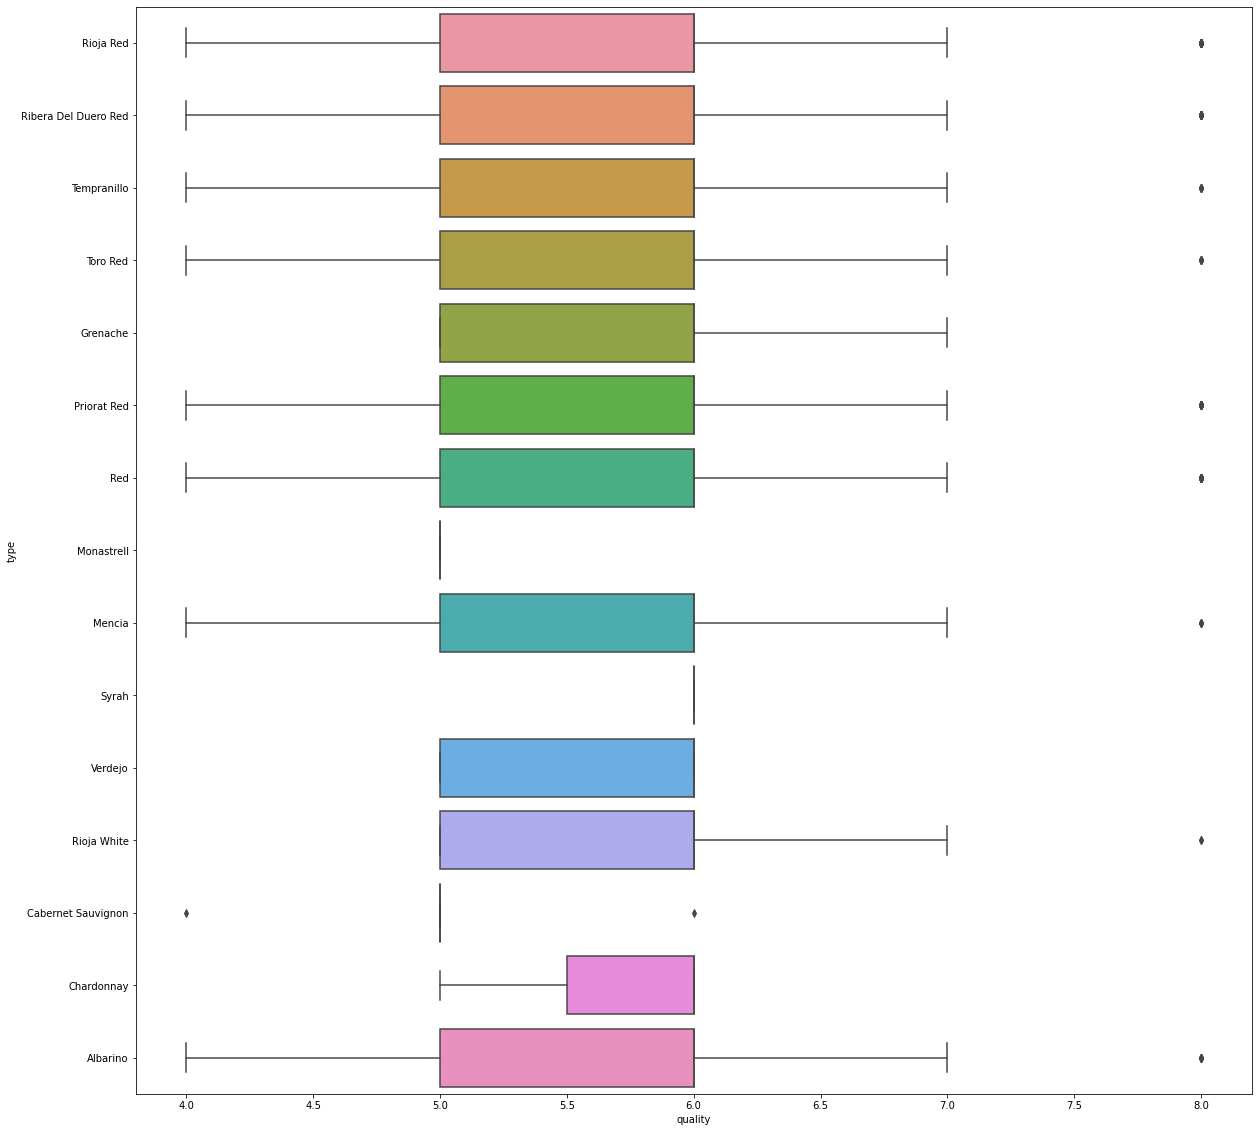

In [66]:
#Boxplot
print('Se puede observar que dentro de un mismo tipo de vino, existe distintas calidades de los mismos')
plt.figure(figsize=(20,20)) #defino el tamaño del grafico
sns.boxplot(y = 'type', x = 'quality', data = df_wine)
plt.show()

C:\Users\xpam08\Miniconda3\envs\vinos_coderhouse\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


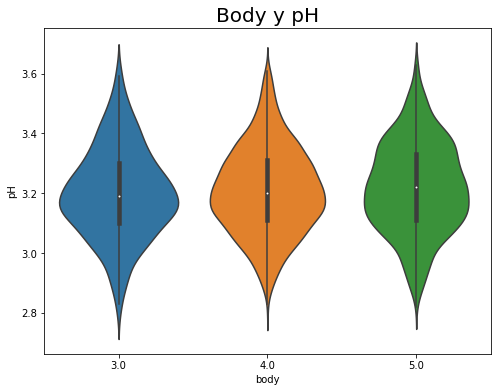

In [68]:
# body vs pH
fig, ax = plt.subplots(figsize=(8,6)) 
sns.violinplot(df_wine['body'], df_wine['pH'], ax=ax)
plt.title('Body y pH', fontsize = 20, fontweight = 30)
plt.show()

### Análisis Multivariado

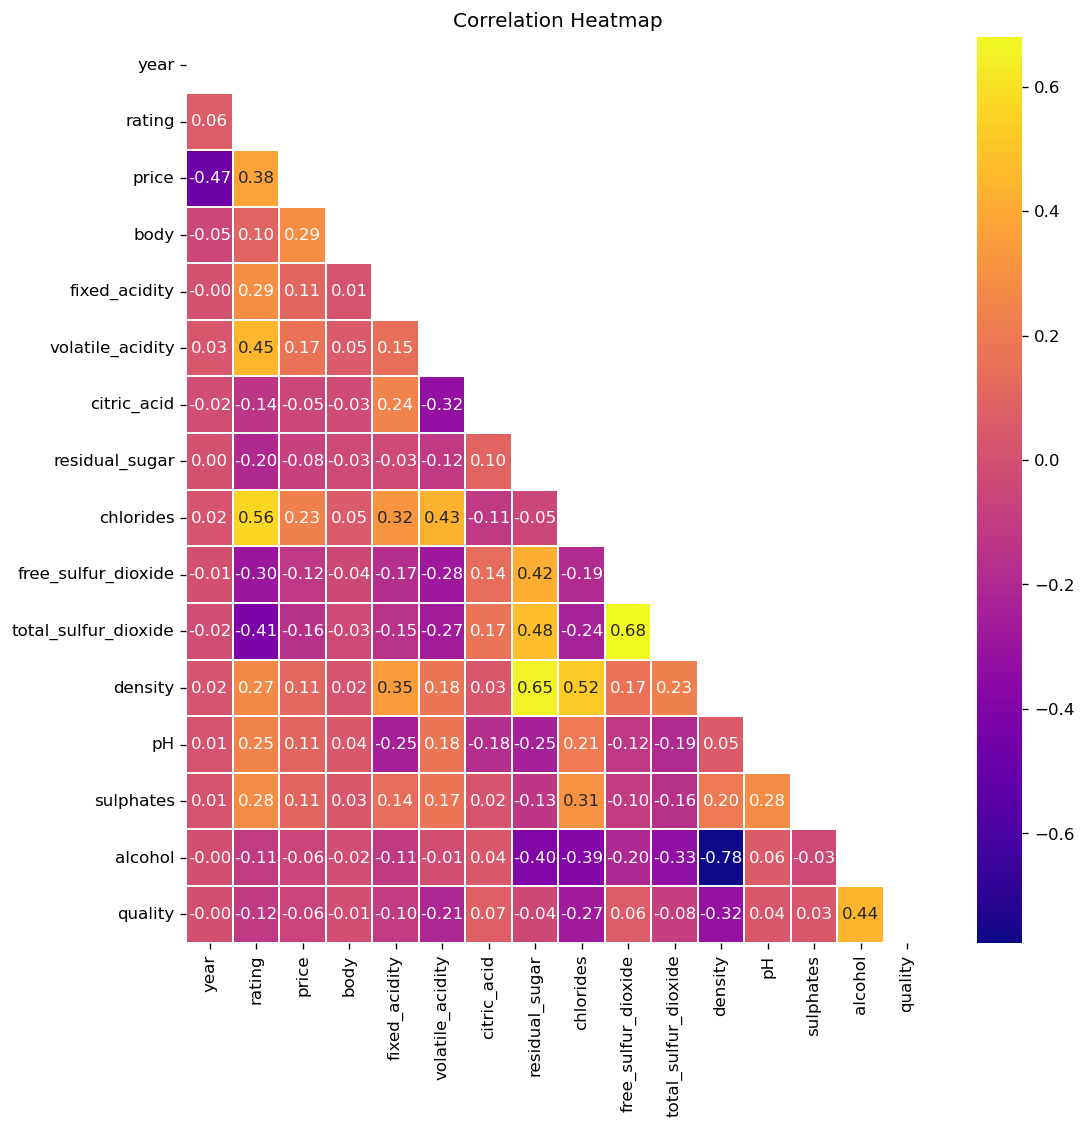

In [69]:
#Correlaciones
plt.figure(dpi = 120,figsize= (10,10))
mask = np.triu(np.ones_like(df_wine.corr(),dtype = bool))
sns.heatmap(df_wine.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()
print('Por medio de dicho gráfico se puede observar, que el rating y la cantidad de clorhidricos en el vino estan relacionadas')

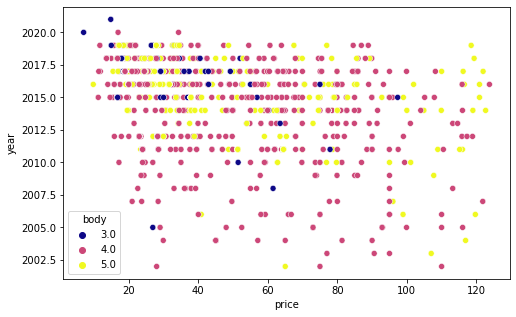

In [74]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='price',y='year',data=df_wine,hue='body',palette = 'plasma')
plt.show()

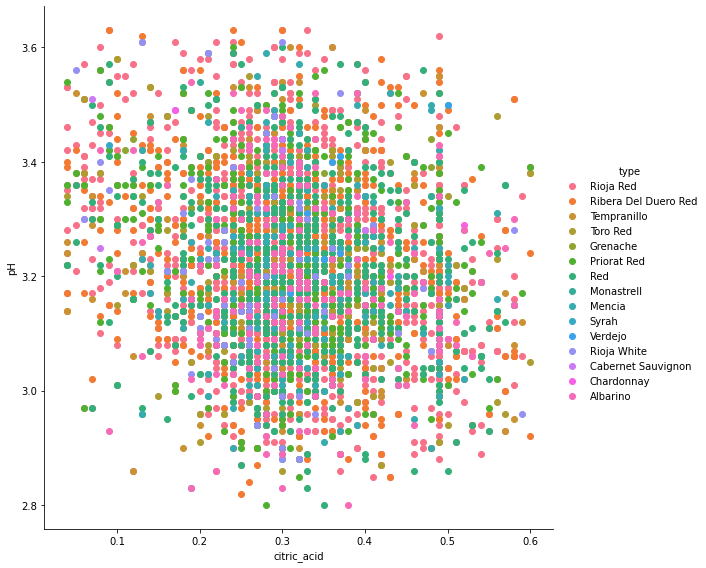

In [77]:
#FacetGrid - citric_acid vs pH
sns.FacetGrid(df_wine,hue = 'type' , height = 8).map(plt.scatter,'citric_acid','pH').add_legend();
plt.show()